# Entrega 3 - MLY0100

**Autor(es):**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 3 de la asignatura optativa de Machine Learning de Duoc UC - Sede concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Cargando los datos

In [71]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-25 04:44:21--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-25 04:44:21--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bf7503ff5fdf57479c1e7c629.dl.dropboxusercontent.com/cd/0/inline/CsSGaCV6cXSMtcxaMnpIFbqS2Z_RhbM6x3g9NCcdz4Uc8XMh0_fJ65uCLKAnuHiCBS_Hal-sqies3mcDOFHJ6CnR4iezlH-WYKH7_ly_yMB1nfuYcqUmSvnIqG4EO0EAFWEB0motmmAEqC7-8Qnv6tOO/file# [following]
--2025-06-25 04:44:21--  https://uc4bf7503ff5fdf57479c1e7c6

In [72]:
!pip install kneed

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

from sklearn.metrics import silhouette_score
import seaborn as sns

# Fase 1 - Comnpresión del negocio

# Fase 2 - Entendimiento de los datos

# Fase 3 - Preparación de datos

# Fase 4 - Modelamiento

## Modelo de segmentación usando 2 variables

### Selección de variables

Se escogen las variables Edad y Consumo, con la finalidad de segmentar a clientes según su edad y el consumo que realizan, con lo que se podría ofrecer algún tipo de crédito y/o inversión que alguien con caracteristicas similares también han hecho.

In [74]:
# Escriba su código acá
df_main = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", decimal=",", low_memory = False)
df = df_main[['Edad', 'CUPO_MX']].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df_scaled)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

### Elección del número de cluster óptimo

El codo está en k = 6
El SSE = [np.float64(19317.745816655977)]


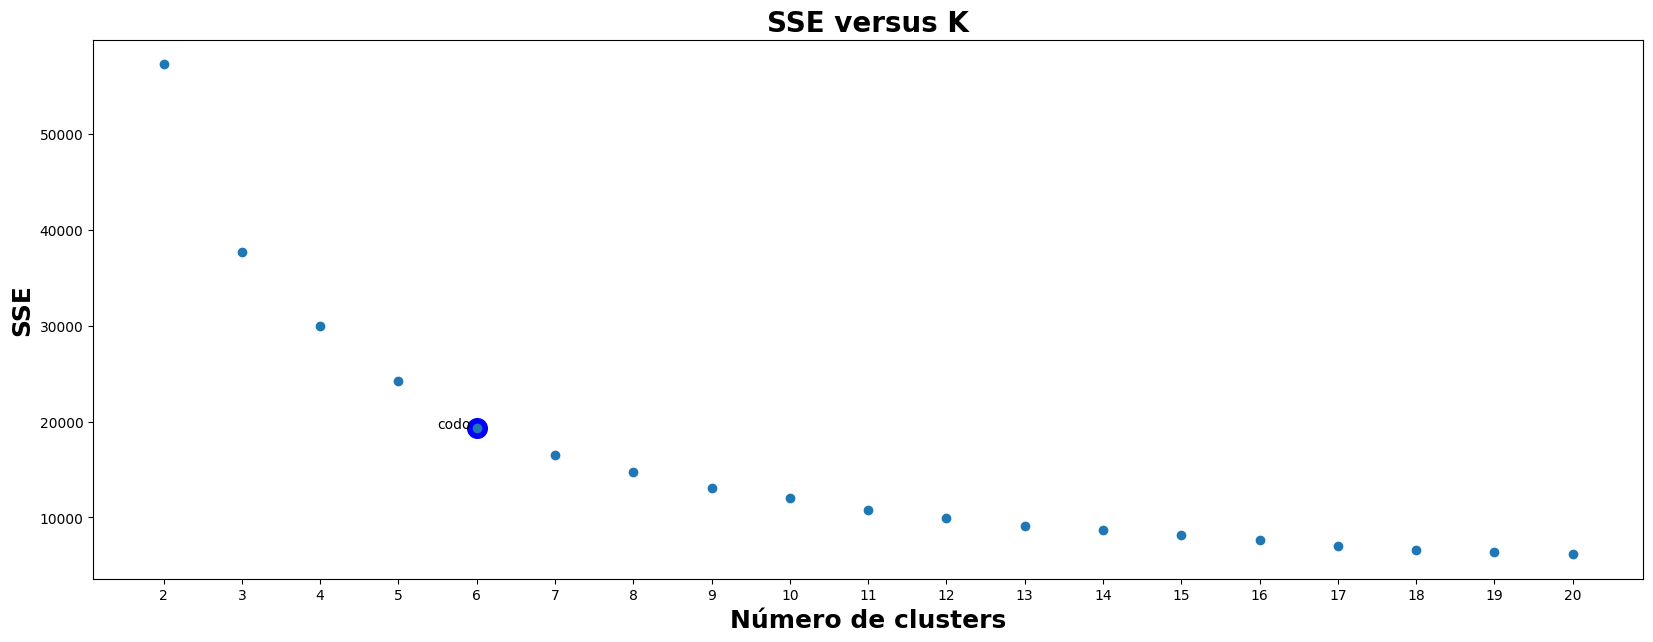

In [75]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(df_imputed)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

fig, ax = plt.subplots(figsize = (20, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-25, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

### Creación y entrenamiento del modelo

In [76]:
# Escriba su código acá
# Primera aplicación de KMeans con las características seleccionadas
kmeans_x= KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_x.fit_predict(df_imputed)
df_main['grupo'] = grupos

In [77]:
# Silhouette Score en espacio seleccionado
silhouette_simple= silhouette_score(df_imputed, grupos)
print(f"Silhouette Score (espacio seleccionado): {silhouette_simple:.4f}")

Silhouette Score (espacio seleccionado): 0.4324


### Evaluación del modelo

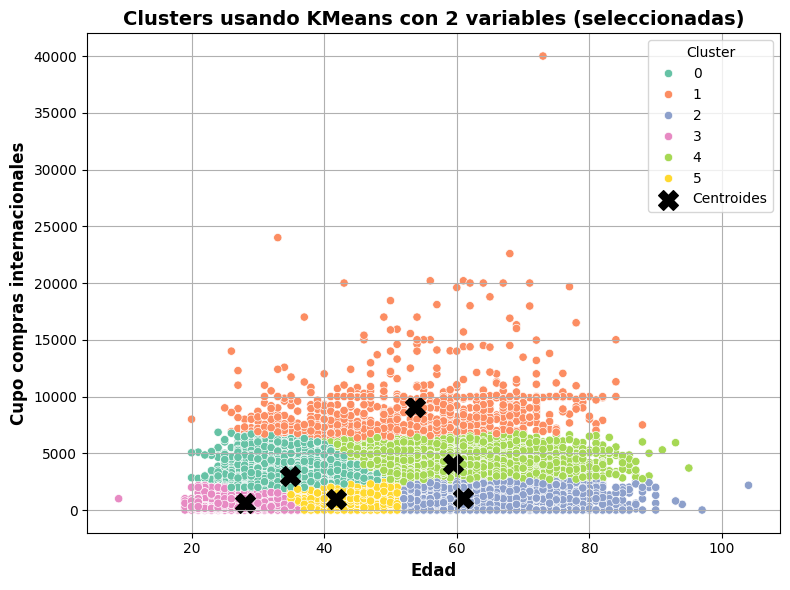

In [78]:
# Escriba su código acá
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

# Gráfica de los grupos
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_main, x='Edad', y='CUPO_MX', hue='grupo', palette='Set2')
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans con 2 variables (seleccionadas)", fontsize=14, fontweight="bold")
plt.xlabel("Edad", fontsize=12, fontweight="bold")
plt.ylabel("Cupo compras internacionales", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
df_centroides = pd.DataFrame(centroides_originales, columns=['Edad', 'Cupo tarjeta'])
df_centroides['cluster'] = range(kl.elbow)
print(df_centroides)

        Edad  Cupo tarjeta  cluster
0  34.836110   2974.586523        0
1  53.746770   9049.394057        1
2  60.873165   1065.856467        2
3  27.990146    575.965398        3
4  59.462551   4011.102692        4
5  41.838835    974.975855        5


-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.67641224 0.32358776]


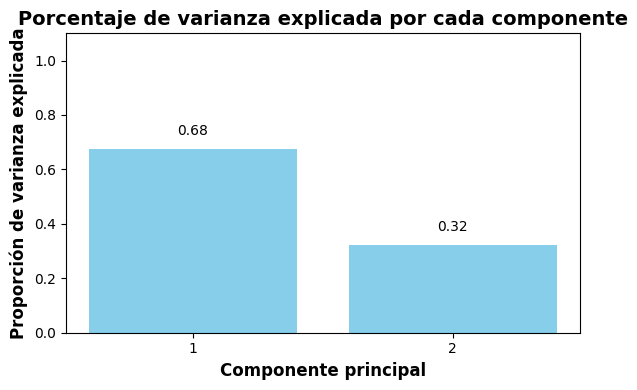

In [80]:
pca = PCA(n_components=2)
pca.fit(df_imputed)

print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca.explained_variance_ratio_)

# Nombres de las variables originales para el gráfico
features = ['Edad', 'CUPO_MX']

# Gráfico de varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x=np.arange(pca.n_components_) + 1,
    height=pca.explained_variance_ratio_,
    color='skyblue'
)

for x, y in zip(np.arange(len(features)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('Proporción de varianza explicada', fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

El primero componente "Edad", explica el 0.68% de la variabilidad.

El segundo componente explica el 0.32%

## Modelo de segmentación usando 4 o más variables

### Selección de las variables

In [81]:
# Escriba su código acá
df_pca = df_main[['Edad', 'Fac_T12', 'UsoL1_T12', 'Txs_T12']].copy()

scaler = StandardScaler()
df_escalado = scaler.fit_transform(df_pca)

imputer = KNNImputer(n_neighbors=3)
df_final = imputer.fit_transform(df_escalado)

df_final = pd.DataFrame(df_final, columns=df_pca.columns)

### Selección de número de clusters óptimo

El codo está en k = 7
El SSE = [np.float64(61446.86033162337)]


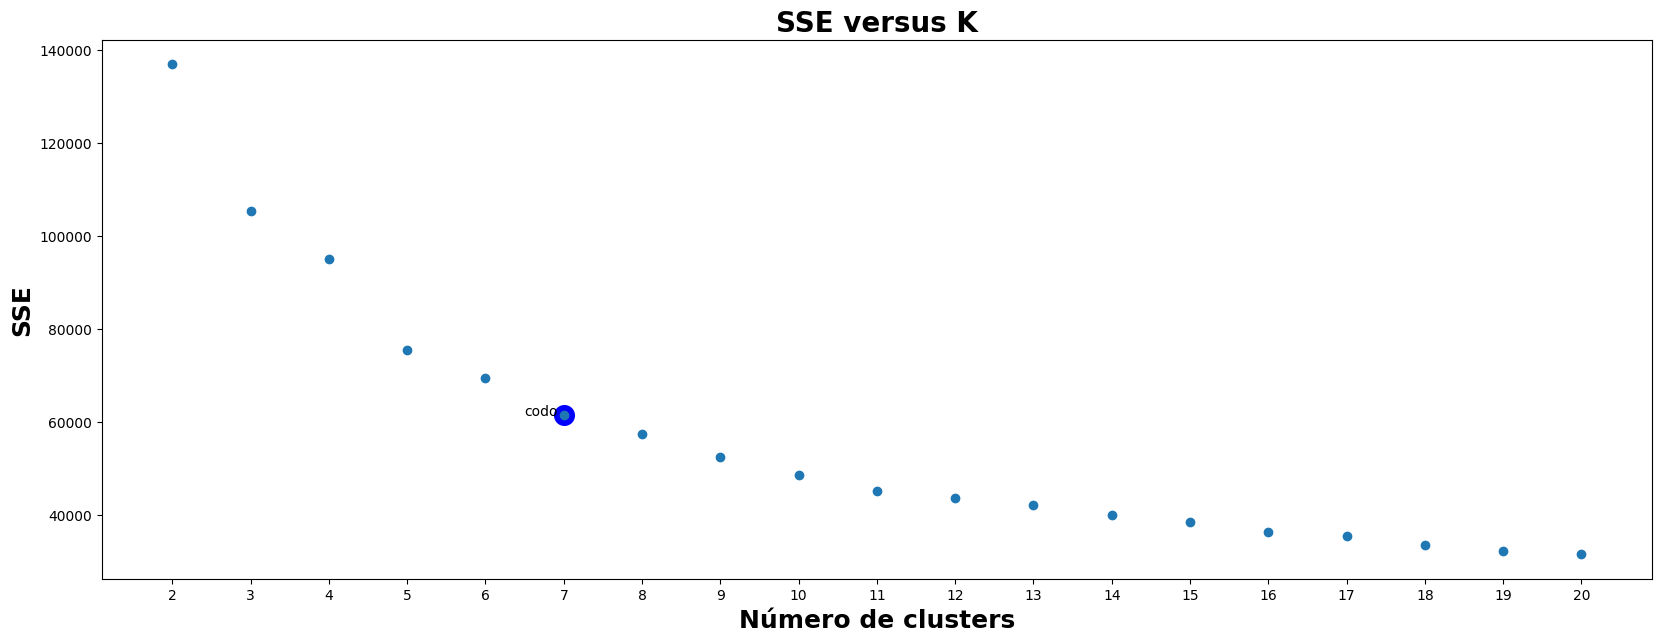

In [82]:
# Escriba su código acá
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(df_final)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

# Gráfico

fig, ax = plt.subplots(figsize = (20, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5, sse[kl.elbow-2]-50, s="codo")       # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

### Creación y entrenamiento del modelo

In [83]:
# Escriba su código acá
kmeans_inicial = KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos_pca = kmeans_inicial.fit_predict(df_final)
df_main['grupo_pca'] = grupos_pca

silhouette_orig = silhouette_score(df_final, grupos_pca)
print(f"Silhouette Score (espacio original): {silhouette_orig:.4f}")

Silhouette Score (espacio original): 0.3107


### Evaluación del modelo

In [84]:
# Escriba su código acá
centroides_all = kmeans_inicial.cluster_centers_
centroides_all_originales = scaler.inverse_transform(centroides_all)
df_all_centroides = pd.DataFrame(centroides_all_originales, columns=df_pca.columns)
df_all_centroides['cluster'] = range(kl.elbow)
print(df_all_centroides)

        Edad        Fac_T12     UsoL1_T12    Txs_T12  cluster
0  62.563118   63612.124406  1.417422e+05   2.502173        0
1  45.848947  246293.679592  3.078238e+05  13.974899        1
2  46.691031   56169.625549  1.131239e+06   2.230493        2
3  28.299529   24309.121273  4.377865e+04   1.181271        3
4  43.708995  761136.897613  3.413536e+05   5.827160        4
5  43.382579   22048.455927  1.622975e+05   0.996723        5
6  34.074232  133437.628292  1.368013e+05   4.874271        6


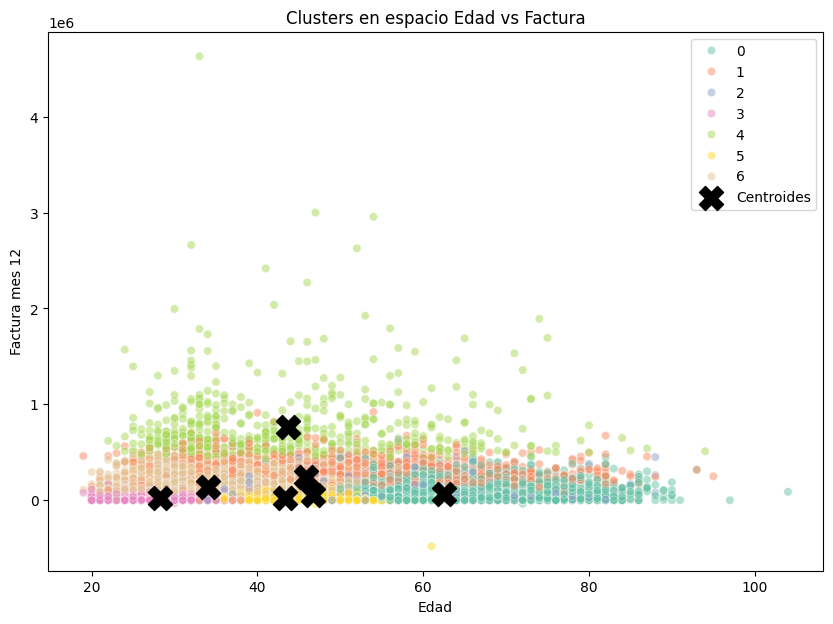

In [85]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_main, x='Edad', y='Fac_T12', hue='grupo_pca', palette='Set2', alpha=0.5)
plt.scatter(df_all_centroides['Edad'], df_all_centroides['Fac_T12'], s=300, c='black', marker='X', label='Centroides')
plt.title('Clusters en espacio Edad vs Factura')
plt.xlabel('Edad')
plt.ylabel('Factura mes 12')
plt.legend()
plt.show()

### Aplicación de PCA


Varianza explicada por cada componente:
Componente 1: 0.4153  |  Acumulada: 0.4153
Componente 2: 0.2782  |  Acumulada: 0.6935
Componente 3: 0.1962  |  Acumulada: 0.8897
Componente 4: 0.1103  |  Acumulada: 1.0000


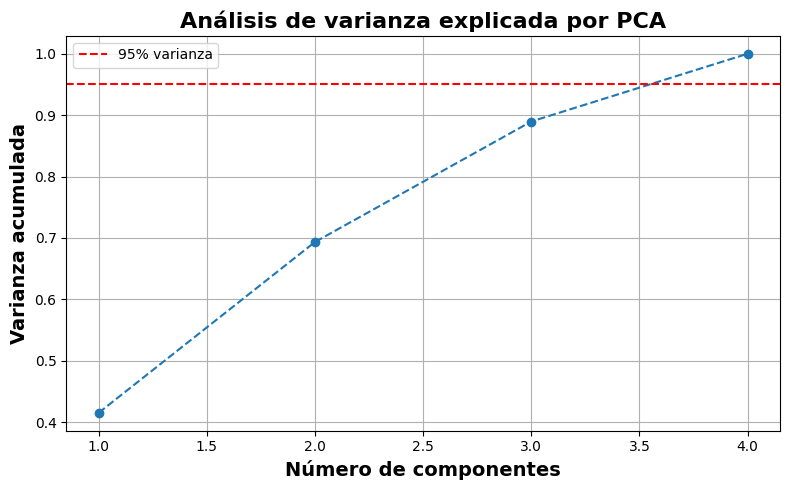


Número de componentes que explican >=95% de la varianza: 4


In [86]:
# Escriba su código acá
# Análisis de varianza explicada por PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(df_final)

# Varianza explicada por cada componente
var_exp = pca_full.explained_variance_ratio_
var_exp_acumulada = np.cumsum(var_exp)

# Mostrar tabla con varianza explicada
print("\nVarianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(var_exp, var_exp_acumulada), 1):
    print(f"Componente {i}: {v_ind:.4f}  |  Acumulada: {v_acum:.4f}")

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_exp) + 1), var_exp_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes', fontsize=14, fontweight="bold")
plt.ylabel('Varianza acumulada', fontsize=14, fontweight="bold")
plt.title('Análisis de varianza explicada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Elegir número óptimo de componentes (>= 95% varianza)
n_componentes_optimos = np.argmax(var_exp_acumulada >= 0.95) + 1
print(f"\nNúmero de componentes que explican >=95% de la varianza: {n_componentes_optimos}")

In [87]:
pca = PCA(n_components=n_componentes_optimos)
X_pca = pca.fit_transform(df_final)

Silhouette Score (espacio PCA): 0.3107


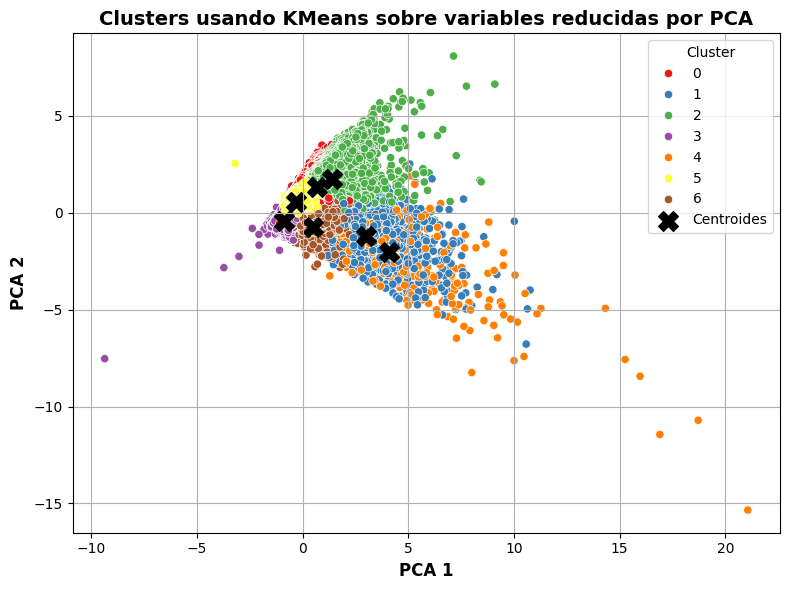

Porcentaje de varianza explicada por PCA: [0.41531761 0.27815977 0.19622406 0.11029857]
Centroides en espacio original:
 [[ 1.79367345 -0.02972824 -0.08365244 -0.02260322]
 [ 0.53719963  1.43368542  0.46369344  3.03988718]
 [ 0.60050264 -0.08934814  3.17737559 -0.09512453]
 [-0.78206314 -0.34457422 -0.40650533 -0.37520033]
 [ 0.37633053  5.5579584   0.5741958   0.86495757]
 [ 0.35179251 -0.36268381 -0.01590935 -0.42446284]
 [-0.34795471  0.52962542 -0.09993564  0.61059652]]
Centroides en espacio PCA:
 [[ 0.69855043  1.31006749 -1.00834187  0.02160646]
 [ 3.01815745 -1.18074205 -0.29060263 -1.11807876]
 [ 1.40618683  1.75816739  2.36279228 -0.00458645]
 [-0.88901575 -0.43750753  0.16967042  0.01879365]
 [ 4.1032491  -2.04599669 -0.23106799  3.3370758 ]
 [-0.30198346  0.57113338 -0.10946656  0.05147012]
 [ 0.49075267 -0.73528081  0.02530585 -0.05321036]]


In [88]:
# KMeans sobre las componentes principales
kmeans_pca = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualización del resultado de aplicar KMeans sobre PCA
df_main['cluster_pca'] = clusters_pca

silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (espacio PCA): {silhouette_pca:.4f}")

# Obtener los centroides en el espacio PCA
centroides_pca = kmeans_pca.cluster_centers_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set1')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans sobre variables reducidas por PCA", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Comparación ---
print("Porcentaje de varianza explicada por PCA:", pca.explained_variance_ratio_)
print("Centroides en espacio original:\n", kmeans_inicial.cluster_centers_)
print("Centroides en espacio PCA:\n", kmeans_pca.cluster_centers_)
